# Weber's Potential
We are using fastpages as suggested by Krishan [ref], and begin with a study of Weberian potentials.

Weber's potential is defined 
$$U= \frac{e_1 e_2}{r} (1-\frac{r'^2}{2c^2}) ,$$ where $e_1,e_2$ are the units of electrical charge carried by the particles $x_1, x_2$ in relation $r=x_2-x_1$. The potential is notable for depending on the relative positions $r$ and the relative velocity $r'=dr/dt$ of the particles. We observe that only electrical quantities appear in the definition, and there is yet no reference to *mass*.

A classic criticism of Helmholtz [ref] against Weber's potential $U$ was that it allowed for arbitrarily large superluminal velocities $1 << r'/c <+\infty $. However Weber argued that Helmholtz' examples had *assumed* an initial superluminal velocity which subsequently diverged to $+\infty$. Thus Weber argued that if particles have initial velocities strictly less than light, $r'/c < 1$, then the trajectories would remain subluminal for all future time $t$.  

This is the question which we examine today: can finite particles attain superluminal velocities in Weber's potential? 

We should recall the fundamental conservation of energy established by Weber (1868?). Thus the kinetic energy $T$ minus the potential $U$ is always constant, i.e. $$\frac{d}{dt} (T-U)=0.$$ Here the kinetic energy $T$ is represented by the sum of the vis viva of the the two particles, i.e. $$T=e_1 v_1^2/2 + e_2 v_2^2/2, $$ where $e_1,e_2$ are the quantities of charge at $x_1, x_2$, and $v_1$, $v_2$ are the velocities of $x_1, x_2$, respectively. We notice that here we do not express kinetic energy ``relationally", but absolutely in terms of the absolute velocities of $v_1, v_2$ around a centre of mass. 

Therefore from the initial conditions $r,r'$ of a two body system, we can determine the maximal possible kinetic energy using the conservation of energy.

# Weber One-Dimension Equations of Motion
In this article we study Weber's potential in one-dimension, and integrate the equations of motion in python, namely using the force $$F=-\hat{r}\frac{dU}{dr}$$ and Newton's Second Law $F=ma=mr''$. This yields the equation $$ (m-\frac{1}{r}) ~~r'' = \frac{1}{r^2}~~(1-\frac{r'^2}{2c^2}).$$ Now one needs be cautious to only invert the multiplicative term $(m-\frac{1}{r})$ when it is bounded away from zero. Thus we tentatively obtain the ordinary differential equation $$r''=\frac{1}{m-\frac{1}{r}}~~ \frac{1}{r^2} ~~(1-\frac{r'^2}{2c^2})$$ which is valid so long as either $$m < 1/r$$ or $$m > 1/r$$ throughout the trajectory. There is implicitly a constant required to compare mass $m$ to the inverse distance $1/r$.

N.B. In practice we set $c=1$. 

#Phipp's Potential

An interesting alternative to Weber's potential was proposed by Phipp [ref], namely $$U^*(r,r'):=\frac{e e'}{r} \sqrt{1-\frac{r'}{c}}.$$ Here it's useful to recall the Taylor expansion $$\sqrt{1-x^2}=1-x^2/2-x^4/8-x^6/16-\cdots .$$
The definition of Phipp's potential therefore coincides with Weber's potential up to the fourth order. 

The basic questions which need be examined for the potentials $U, U^*$ are: 

(i) Can free falling particles relative to the potentials $U, U^*$ attain superluminal velocities ? 

(ii) Do the potentials $U, U^*$ satisfy Conservation of Energy ?

(iii) Do the potentials satisfy Conservation of Angular Momentum ? 



In [ ]:
#!pip install sympy
from sympy import *



Derivative(r(t), t)

In [27]:
# Defining Webers potential $U$ with $c=1$ and $e=e'=1$ in one-dimension.

from sympy import *
t=symbols('t')
m=symbols('m')
r=Function('r')(t)
U=Function('U')(r,t)
F=Function('F')(r,t)
U=(r**-1)*(1-(r.diff(t))**2/2)
F=(-1)*(U.diff(t))*((r.diff(t))**-1)

pprint(simplify(U))
print()
pprint(simplify(F))


              2
    ⎛d       ⎞ 
2 - ⎜──(r(t))⎟ 
    ⎝dt      ⎠ 
───────────────
     2⋅r(t)    

                           2    
                 ⎛d       ⎞     
       2         ⎜──(r(t))⎟     
      d          ⎝dt      ⎠     
r(t)⋅───(r(t)) - ─────────── + 1
       2              2         
     dt                         
────────────────────────────────
              2                 
             r (t)              


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 120
     njev: 8
      nlu: 8
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.35229098e-03, 6.70458196e-03, 1.94530094e-02,
       3.22014368e-02, 4.49498643e-02, 5.35130409e-02, 5.98814923e-02,
       6.47314000e-02, 6.78437169e-02, 7.09560339e-02, 7.40683508e-02,
       8.02929846e-02, 8.65176185e-02, 9.27422523e-02, 9.89668861e-02,
       1.14037343e-01, 1.29107800e-01, 1.44178257e-01, 1.59248714e-01,
       1.74319171e-01, 2.00424415e-01, 2.26529658e-01, 2.52634902e-01,
       2.78740146e-01, 3.18247720e-01, 3.57755294e-01, 3.97262869e-01,
       4.36770443e-01, 5.13664401e-01, 5.90558360e-01, 6.67452318e-01,
       7.44346277e-01, 7.83159942e-01, 8.69723913e-01, 9.56287884e-01,
       1.04285186e+00, 1.19028003e+00, 1.33770821e+00, 1.48513638e+00,
       1.73472681e+00, 1.98431724e+00, 2.23390766e+00, 2.63886616e+00,
       3.04382466e+00, 3.44878316e+00, 4

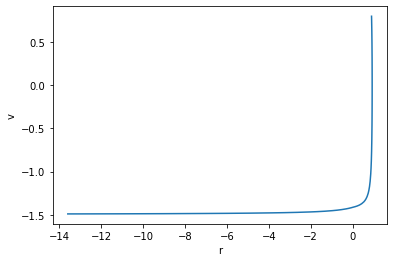

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# make sure everything is SI
#q = 1.602176634E-19 # charge assuming it is a proton
#B = 4 # magnetic field magnitude
#m = 2E-27 # mass
#E =  2 * 1.60218E-13 # kinetic energy in joules
#C = q * B / m # constant for convenience
v0 = -0.1
r0= 1

initial = [1.0,-0.1]  ## good initial [position, velocity] since we see the conservation of energy, 
## i.e. the solution will have initial velocity, and most of the energy being contained in the kinetic energy.
## therefore if particle enters from afar with a given velocity, then the particle either stays confined within the potential energy, 
## or the particle exits the potential and exits with the same velocity but possibly in another direction.

def ivf(t, Z) :
# Z=[position, velocity]=[r,v]
    m=1
    a1=Z[0]**-2
    a2=(m-(Z[0]**-1))
    a3=(1-(Z[1]**2)/2)

    dvdt = a1*(a2**-1)*a3
    drdt= Z[1]
    return [drdt, dvdt]

sol = solve_ivp(ivf, [0, 10], [0.9, .8], 
                method='LSODA') #t_eval=[10,20,30,40,50, 60, 70, 80,90]) 

print(sol)

plt.plot(sol.y[0], sol.y[1])
plt.xlabel('r')
plt.ylabel('v')
plt.title('')
plt.show()

In [ ]:
## on the same graph could we also plot the values of the potential $U(r,v)$ throughout the orbit.
(sol.y[0], sol.y[1])

(array([1.00000000e+00, 9.43322627e-01, 3.76793254e-01, 9.42046536e-02,
        3.81852881e-02, 3.26377040e-02, 2.71140479e-02, 2.16257607e-02,
        1.70140820e-02, 1.53381082e-02, 1.25774416e-02, 9.86516920e-03,
        7.78632096e-03, 5.09993582e-03, 4.36254373e-03, 3.42446355e-03,
        2.72300277e-03, 2.59184659e-03, 2.50525583e-03, 2.46838925e-03,
        2.52855629e-03, 2.74079751e-03, 3.07225357e-03, 3.78716648e-03,
        4.88265158e-03, 6.08803528e-03, 8.09041438e-03, 1.09618514e-02,
        1.52424781e-02, 2.13902745e-02, 3.18119371e-02, 4.86618201e-02,
        7.72762163e-02, 1.27525570e-01, 2.17520121e-01, 3.70294192e-01,
        7.15360286e-01, 1.44147206e+00, 3.14149144e+00, 7.42308457e+00,
        1.83482297e+01, 4.40025970e+01]),
 array([-0.9       , -0.89996024, -0.89889624, -0.89329756, -0.88240754,
        -0.87922385, -0.8746901 , -0.86773475, -0.85811274, -0.8530393 ,
        -0.84136552, -0.82247504, -0.79709916, -0.72147277, -0.67594813,
        -0.56572672

In [ ]:
from sympy import *
t=symbols('t')
m=symbols('m')
r=Function('r')(t)
U=Function('U')(r,t)
F=Function('F')(r,t)


U=(r**-1)*sqrt(1-r.diff(t))
F=(-1)*(U.diff(t))*((r.diff(t))**-1)

pprint(simplify(U))
print()
pprint(simplify(F))


    ______________
   ╱     d        
  ╱  1 - ──(r(t)) 
╲╱       dt       
──────────────────
       r(t)       

                                 2      
                                d       
                          r(t)⋅───(r(t))
                                 2      
⎛    d       ⎞ d               dt       
⎜1 - ──(r(t))⎟⋅──(r(t)) + ──────────────
⎝    dt      ⎠ dt               2       
────────────────────────────────────────
       ______________                   
      ╱     d          2    d           
     ╱  1 - ──(r(t)) ⋅r (t)⋅──(r(t))    
   ╲╱       dt              dt          


In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


v0 = -0.1
r0= 1


initial = [r0,v0] 

def ivf(t, Z) :
# Z=[position, velocity]=[r,v]
    A=(Z[0]**2)*(sqrt(1-Z[1]))*((1-Z[1])**-1)
    B=Z[0]*(( 2*Z[1]*(1-Z[1]) )**-1) 
    dvdt = (A+B)**-1
    drdt= Z[1]
    return [drdt, dvdt]

sol = solve_ivp(ivf, [0, 100], [0.1, -0.8], 
                method='LSODA') 

print(sol)

plt.plot(sol.y[0], sol.y[1])
plt.xlabel('r')
plt.ylabel('v')
plt.title('Two Body System of Equal Charges and Equal Mass w.r.t. Phipps Potential')
plt.show()

TypeError: ignored

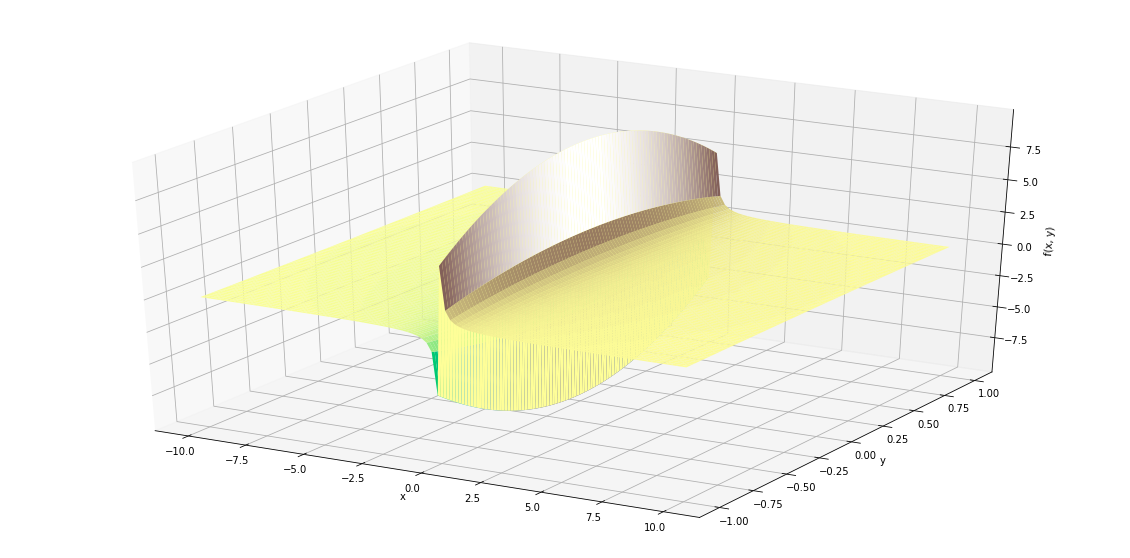

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def plot_surface(domain, fn, grid_samples=100, title=None, **plot_kwargs):
    x = np.linspace(domain[0][0], domain[0][1], grid_samples)
    y = np.linspace(domain[1][0], domain[1][1], grid_samples)
    
    X, Y = np.meshgrid(x, y)
    
    fn_vectorized = np.vectorize(fn)
    Z = fn_vectorized(X, Y)
    
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, **plot_kwargs)
    ax.set(xlabel="x", ylabel="y", zlabel="f(x, y)", title=title)
    plt.close()

    return fig, ax

# now let's try it out!
def func(r, v):
    return (r**-1)*(1-v**2/2)
    
domain = [(-10, 10), (-1, +1)] 
fig, ax = plot_surface(domain, func, rstride=1, cstride=1, cmap='terrain', edgecolor=None)

fig